## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [4]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from icecream import ic

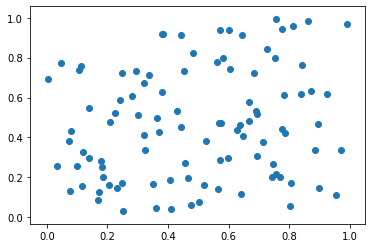

In [5]:
# %matplotlib inline
random_data = np.random.random((100, 2))
X = random_data[:, 0]
Y = random_data[:,1]

plt.scatter(X, Y)


In [57]:
random_data
X

array([0.27562764, 0.22034597, 0.25514153, 0.69712036, 0.71691096,
       0.2810688 , 0.43902753, 0.98358776, 0.95182416, 0.02096077,
       0.22886871, 0.72289816, 0.11070981, 0.36337449, 0.17486422,
       0.2390066 , 0.70808349, 0.00598323, 0.693187  , 0.56925749,
       0.75757204, 0.51099406, 0.83212528, 0.0686582 , 0.1243046 ,
       0.59043164, 0.08595381, 0.55634456, 0.26308404, 0.56462231,
       0.74954674, 0.80537543, 0.09183093, 0.01076709, 0.15913681,
       0.17008466, 0.15995242, 0.97023528, 0.11850541, 0.26097673,
       0.24841922, 0.80794452, 0.81857853, 0.87562925, 0.68719228,
       0.46276489, 0.44356609, 0.00116953, 0.31659746, 0.7821273 ,
       0.15654886, 0.19739148, 0.82443744, 0.6721557 , 0.53465554,
       0.44589374, 0.63118401, 0.05397527, 0.07762672, 0.24921999,
       0.70430466, 0.69994603, 0.89253373, 0.68577908, 0.76480384,
       0.95962383, 0.40662374, 0.41510059, 0.57066511, 0.75194815,
       0.5591256 , 0.46661846, 0.80418233, 0.97476963, 0.36217

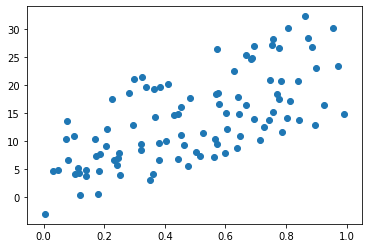

In [8]:
y = [20 * x + 5 + random.randint(-10, 10) for x in X]

plt.scatter(X, y)

In [6]:
X.reshape(-1, 1)
X[:10,]

array([0.40506536, 0.84234079, 0.42946785, 0.74721226, 0.25177723,
       0.03210442, 0.62706441, 0.32543574, 0.57257701, 0.64427731])

## 线性回归
$$ y = k * x + b $$

In [9]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X.reshape(-1, 1), y)

In [10]:
print('回归线的k值是: {0}'.format(reg.coef_))
print('回归线的截距b是: {0}'.format(reg.intercept_))
print('回归线的R^2是: {0}'.format(reg.score(X.reshape(-1, 1), y)))

回归线的k值是: [19.41666004]
回归线的截距b是: 4.337110680351273
回归线的R^2是: 0.449044748995828


In [11]:
### function of predicting new data
def regression_value(x):
    return reg.coef_ * x + reg.intercept_

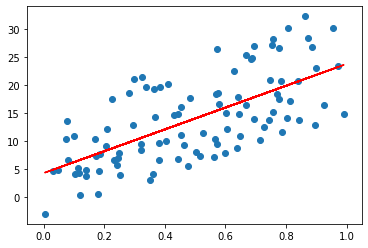

In [12]:
plt.scatter(X, y)
plt.plot(X, regression_value(X), color = 'red')

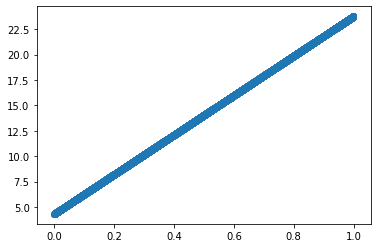

In [13]:
def generate_random_X(n): # n means the number of randomed data
    return [np.random.random((50, 2)) for i in range(n)]

new_dataset_X = generate_random_X(100)

## plot
plt.scatter(new_dataset_X, regression_value(new_dataset_X))

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [2]:
# you code here

In [14]:
from scipy.spatial.distance import cosine

def model(X, y):
    return [(Xi, yi) for Xi, yi in zip(X, y)]

In [15]:
def distance(x1, x2):
    return cosine(x1, x2)

In [16]:
from collections import Counter
def predict(x, k=5):
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
#     most_similars = sorted(model(X, y), key=lambda xi: xi[0])[:k] # the cos distance between two numbers is 0.
    # 已经获得了最相似的数据集
#     most_similars.Couner().most_common()
#     cosine_distance = sorted([distance(xi[0], x) for xi in model(X, y)])
#     return model(most_similars, cosine_distance)
    return np.mean([i[1] for i in most_similars]) # get the mean of the most similar sets' values

In [17]:
# print(distance([1,2,3], [4,5,6]))
# print(distance([1,2,3], [6,5,9]))
# X = np.random.random((50, 2))
# Y = np.random.random((25, 1))
# model(X, y)
# list(zip(X, y))
# print(cosine((0.3633744887636341, 11.267489775272683), (0.892533725055378, 30.85067450110756)))
# print(cosine((0.892533725055378, 30.85067450110756), (0.892533725055378, 30.85067450110756)))
# print(cosine(0.3633744887636341, 0.892533725055378))
# print(Counter(X.tolist()).most_common())
predict(0.892533725055378)

11.176234836823316

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [203]:
from collections import defaultdict

def entropy(inlist):
#     frequency_dict = defaultdict(list)
#     frequency = []
    Entropy = 0
    for i in set(inlist):
#         print(i)
        single_frequency = inlist.count(i) / len(inlist)
#         frequency_dict[i] = single_frequency
#         print(single_frequency)
        Entropy += single_frequency * np.log(single_frequency)
        
    return -1 * Entropy
#     counter = Counter(inlist)
#     probs = [counter[c] / len(inlist) for c in set(inlist)]
#     return - sum(p * np.log(p) for p in probs)
    

In [19]:
# entropy(range(4))
entropy([1, 1, 1, 0])

0.5623351446188083

In [159]:
# mock_data = {
#     'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
#     'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
#     'family_number': [1, 1, 2, 1, 1, 1, 2],
#     'bought': [1, 1, 1, 0, 0, 0, 1],
# }

# mock_data = {
#     'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'M'],
#     'income': ['+10', '-10', '+10', '+10', '-10', '-10', '-10', '-10', '+10', '+10', '+10', '-10', '+10', '+10','-10','-10'],
#     'family_number': [1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2],
#     'loan': [0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1],
#     'bought': [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0],
# }

In [231]:
def createDataSet():
	dataSet = [[-10, 2, 0, 'F', 0],						#数据集
			[-10, 2, 1, 'F', 0],
			[-10, 2, 1, 'M', 1],
			[-10, 1, 0, 'M', 1],
			[-10, 2, 0, 'F', 0],
			[10, 2, 0, 'F', 0],
			[10, 2, 1, 'F', 0],
			[10, 1, 1, 'M', 1],
			[10, 1, 2, 'F', 1],
			[10, 1, 2, 'F', 1],
			[20, 1, 2, 'F', 1],
			[20, 1, 1, 'F', 1],
			[20, 2, 1, 'M', 1],
			[20, 2, 2, 'M', 1],
			[20, 2, 0, 'F', 0]]
	labels = ['income', 'family_number', 'loan', 'gender', 'bought']		#特征标签
	return dataSet 							#返回数据集和分类属性

mock_data = createDataSet()

In [247]:
dataset = pd.DataFrame.from_dict(mock_data)
dataset.columns = ['income', 'family_number', 'loan', 'gender', 'bought']
type(dataset)
# dataset.values.tolist()
dataset

,income,family_number,loan,gender,bought
0,-10,2,0,F,0
1,-10,2,1,F,0
2,-10,2,1,M,1
3,-10,1,0,M,1
4,-10,2,0,F,0
5,10,2,0,F,0
6,10,2,1,F,0
7,10,1,1,M,1
8,10,1,2,F,1
9,10,1,2,F,1


In [206]:
family_number_set1 = dataset[dataset['family_number']==1]
family_number_set2 = dataset[dataset['family_number']!=1]

In [163]:
entropy(family_number_set1['bought'].tolist()) + entropy(family_number_set2['bought'].tolist())

1.3862943611198906

In [164]:
gender_set1 = dataset[dataset['gender']=='F']
gender_set2 = dataset[dataset['gender']!='F']
entropy(gender_set1['bought'].tolist()) + entropy(gender_set2['bought'].tolist())

1.369869681297795

In [237]:
def best_feature_selection(training_data, target):
    x_fields = set(training_data.columns.tolist()) - {target}
    # Warning! the set is unordered, so using set to remove 'bought' would change the order of colnames
    spliter = None
    min_entropy = float('inf') # set initialized minimal entropy as Inf, then adjust it in the following steps.
    
    for f in x_fields:
#         ic(f)
        values = set(training_data[f])
#         ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            entropy_1 = entropy(sub_spliter_1)

            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            entropy_2 = entropy(sub_spliter_2)

            entropy_sum = entropy_1 + entropy_2
#             ic(entropy_sum)
            
            if entropy_sum <= min_entropy:
                min_entropy = entropy_sum
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    print(x_fields)
    return list(x_fields).index(spliter[0]) #+ (min_entropy)
 
best_feature_selection(dataset, target = 'bought')

spliter is: ('family_number', 2)
the min entropy is: 0.6365141682948128
{'income', 'loan', 'family_number', 'gender'}


2

In [119]:
# int(dataset.loc[1, 'bought'])
type(list(dataset))
# list(dataset)
# dataset
# dataset.shape
type(dataset)

pandas.core.frame.DataFrame

In [208]:
from collections import Counter
def get_most_label(classList):
    classDict = Counter(classList).most_common()
    return list(classDict)[0][0] # retrieve the most frequent element
# get_most_label([1, 1, 1, 2, 2, 3])

In [218]:
def split_data(dataframe, feature, _value):
    dataframe2 = dataframe[dataframe[feature]==_value]
    dataframe3 = dataframe2.drop(feature, 1)
    
    return dataframe3

In [210]:
from collections import Counter
def get_most_choice_in_training_set(training_data, target):
    return list(Counter(training_data[target].values.tolist()).most_common())[0][0]

In [199]:
def createDataSet2():
	dataSet = [[0, 0, 0, 0, 'no'],						#数据集
			[0, 0, 0, 1, 'no'],
			[0, 1, 0, 1, 'yes'],
			[0, 1, 1, 0, 'yes'],
			[0, 0, 0, 0, 'no'],
			[1, 0, 0, 0, 'no'],
			[1, 0, 0, 1, 'no'],
			[1, 1, 1, 1, 'yes'],
			[1, 0, 1, 2, 'yes'],
			[1, 0, 1, 2, 'yes'],
			[2, 0, 1, 2, 'yes'],
			[2, 0, 1, 1, 'yes'],
			[2, 1, 0, 1, 'yes'],
			[2, 1, 0, 2, 'yes'],
			[2, 0, 0, 0, 'no']]
	labels = ['年龄', '有工作', '有自己的房子', '信贷情况']		#特征标签
	return dataSet, labels 							#返回数据集和分类属性

In [253]:
def continous_best_feature_selection(training_data, target, labels, featLabels):
#     x_fields = set(training_data.columns.tolist()) - {target}

#     step = 1
    feature_chosen_list = []
    feature_entropy_dict = {}
    
    ClassList = training_data.loc[:, 'bought'].values.tolist()
#     return ClassList
#     print(ClassList)
#     print(labels)
    if len(ClassList) == 0:
        return get_most_choice_in_training_set(dataset, target)
    elif len(ClassList) == ClassList.count(ClassList[0]):
        return ClassList[0]
    elif len(labels) == 0 or training_data.shape[1] == 1:
        return get_most_label(ClassList)
    
    best_feature_index = best_feature_selection(training_data, target)
    best_feature = labels[best_feature_index]
    
    featLabels.append(best_feature)
    myTree = {best_feature:{}}
    del labels[best_feature_index]
    print(best_feature_index)
    print(training_data)
    unique_feature_values = set([i[best_feature_index] for i in training_data.values.tolist()])
    for value in unique_feature_values:
            subLabels = labels[:]
#             print(best_feature, value)
#             print(split_data(training_data, best_feature, value))
            myTree[best_feature][value] = continous_best_feature_selection(split_data(training_data, best_feature, value), target, subLabels, featLabels)
    return myTree

# print(dataset)
Labels = list(set(dataset.columns.tolist()) - {'bought'}) #[i for i in dataset.columns.tolist() if i != 'bought'] #
# print(Labels)
dataset2 = dataset.loc[:, Labels + ['bought']]
# print(dataset2)
Tree_model = continous_best_feature_selection(dataset2, 'bought', Labels, [])
# dataset

# # Another dataSet
# dataSet, labels = createDataSet2()
# dataSet = pd.DataFrame(dataSet)
# dataSet.columns = labels + ['bought']
# # print(dataSet)
# continous_best_feature_selection(dataSet, 'bought', labels, [])


spliter is: ('family_number', 2)
the min entropy is: 0.6365141682948128
{'income', 'loan', 'family_number', 'gender'}
2
    income  loan  family_number gender  bought
0      -10     0              2      F       0
1      -10     1              2      F       0
2      -10     1              2      M       1
3      -10     0              1      M       1
4      -10     0              2      F       0
5       10     0              2      F       0
6       10     1              2      F       0
7       10     1              1      M       1
8       10     2              1      F       1
9       10     2              1      F       1
10      20     2              1      F       1
11      20     1              1      F       1
12      20     1              2      M       1
13      20     2              2      M       1
14      20     0              2      F       0
spliter is: ('gender', 'F')
the min entropy is: -0.0
{'income', 'loan', 'gender'}
2
    income  loan gender  bought
0      -10  

In [ ]:
# def continous_optimal_feature_selection(training_data, target):
#     x_fields = set(training_data.columns.tolist()) - {target}
    
#     training_data1 = training_data
#     training_data2 = training_data
#     ## 1st step
#     best_feature = best_feature_selection(training_data, target)[0] #('family_number', 2)
#     cutting_value = best_feature_selection(training_data, target)[1]
#     first_step_entropy = best_feature_selection(training_data, target)[2]
    
#     for i in range(1, len(x_fields)):        
#         training_data1 = training_data1[training_data[best_feature]==cutting_value]
#         training_data2 = training_data2[training_data[best_feature]!=cutting_value]
#         training_data1 = training_data1.drop(best_feature, 1) # remove used feature column
#         training_data2 = training_data2.drop(best_feature, 1) # remove used feature column
        
#         best_feature_list1 = best_feature_selection(training_data1)
#         best_feature_list2 = best_feature_selection(training_data1)
    

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [39]:
from sklearn.cluster import KMeans

## Part-2 Question and Answer 问答

In [40]:
X = [random.randint(0, 100) for i in range(100)]
Y = [random.randint(0, 100) for i in range(100)]

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

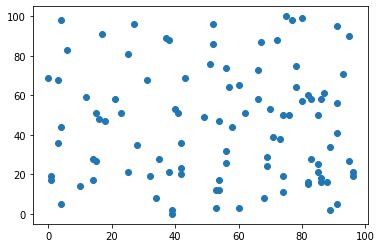

In [41]:
plt.scatter(X, Y)

Ans:

In [34]:
training_data = [[i, j] for i, j in zip(X, Y)]

In [35]:
cluster = KMeans(n_clusters=5, max_iter=1000)

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

In [37]:
cluster.fit(training_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

In [38]:
cluster.cluster_centers_

array([[80.82352941, 15.76470588],
       [24.39130435, 61.39130435],
       [76.14285714, 76.14285714],
       [33.85185185, 23.2962963 ],
       [17.25      , 91.83333333]])

In [45]:
cluster.labels_

array([0, 1, 0, 4, 3, 2, 0, 3, 3, 1, 3, 2, 0, 2, 4, 1, 1, 0, 3, 2, 0, 3,
       3, 3, 2, 4, 0, 1, 3, 3, 3, 1, 0, 0, 0, 0, 3, 4, 1, 1, 2, 3, 0, 3,
       1, 4, 3, 1, 1, 3, 2, 2, 2, 1, 1, 1, 0, 2, 1, 2, 4, 2, 1, 3, 4, 4,
       1, 1, 1, 2, 3, 3, 3, 2, 0, 1, 2, 4, 2, 3, 0, 2, 0, 3, 3, 3, 2, 4,
       2, 1, 1, 3, 0, 2, 4, 3, 4, 2, 1, 3], dtype=int32)

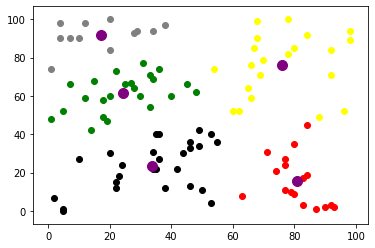

In [55]:
from collections import defaultdict

cluster_label = defaultdict(list)

for label, location in zip(cluster.labels_, training_data):
    cluster_label[label].append(location)

### plot
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']
for label, center in enumerate(cluster_label):
#     print(label)
    for location in cluster_label[center]:
#         print(location)
        plt.scatter(*location, c = color[label])

for i in range(len(cluster.cluster_centers_)):
    location = cluster.cluster_centers_[i]
    plt.scatter(*location, c = 'purple', s=100)
    
    

Ans:

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans: $$ Precision = \frac{TP}{TP + FP} $$
     $$ Recall = \frac{TP}{TP+FN} $$
     $$ F1-score = \frac{2*Precision*Recall}{Precision + Recall} $$
     $$ F2-score = \frac{5*Precision*Recall}{4*Precision + Recall} $$

Ans: 
   1. **Precision** means how accurate a machine learning model is, namely the true positive divided by all predicted positive samples number.
     
   2. **Recall** measures the fraction of true positive that are successfully retrieved. Also, it can be understood that the threshold that seperates the true positive and false negative.
     
   3. **AUC**: Area under curve. This term means the performance of a model.
     
   4. **F1-score**: Because the precision competes with recall, and it is often hard to measure which model is better just by precision or recall. To balance them, a F1-score is used to give precision and recall same weight in some conditions, so we can judge which model is better.
     
   5. **F2-score**: Sometimes, the weight of precision and recall is different for we would prefer someone. For example, we prefer recall rather than precision in the epidemic disease detection, while precision is more important than recall in the court trial. Under this circumstance, we add a weight parameter \beta to adjust the importance of precision and recall. When more importance is on precision, the \beta would be less than 1, otherwise, it is greater than 1. It is **F2-Score when the \beta is 2**.

 $$ F-score = (1 + \beta^2) * \frac{Precision*Recall}{\beta^2*Precision + Recall} $$

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

Ans: **Machine learning** is the scientific study that computers use to perform tasks under algorithms and statistical models without using clear instructions. It can undermine underlying mechanisms of data, which can be then used to predict new results with other new data. Without doubt, it is a part of Artificial Intelligence.

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

Ans: I think it's correct. Through a universal and correct evaluation system and method, we know what a model needs, and we can know a model's performance including precision, recall, etc, under different conditions. From that, the problem that which model is better can be solved.

Also, we can understand the advantages and disadvantages, which provides basis of choice when solving problems and should be the direction that we try to move forward. 

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

### Decision Tree

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

In [270]:
def predict(DT_model, feature_labels, test_var):
    firstStr = next(iter(DT_model))
    secondDict = DT_model[firstStr]
    
    feature_label_index = feature_labels.index(firstStr)
    for _key in secondDict.keys():
        if test_var[feature_label_index] == _key:
            if type(secondDict[_key]).__name__ == 'dict':
                predict_result = predict(secondDict[_key], feature_labels, test_var)
            else:
                predict_result = secondDict[_key]
    return str(predict_result) #'feature list is ' + ' '.join(np.array(test_var, dtype=str).tolist()) + '. The predicted result is: ' + str(predict_result)

# dataset2
# income  loan  family_number gender  bought
# -10     0              2      F       0
# -10     1              2      F       0
# -10     1              2      M       1
# -10     0              1      M       1
# -10     0              2      F       0
# 10     0              2      F       0
# 10     1              2      F       0
# 10     1              1      M       1
# 10     2              1      F       1
# 10     2              1      F       1
# 20     2              1      F       1
# 20     1              1      F       1
# 20     1              2      M       1
# 20     2              2      M       1
# 20     0              2      F       0
# 20     2      M       1

feature_labels = ['income', 'loan', 'family_number', 'gender']
print(Tree_model)
predict(Tree_model, feature_labels, [10, 0, 1, 'M'])


{'family_number': {1: 1, 2: {'gender': {'M': 1, 'F': 0}}}}


'1'

In [269]:
income_list = [-10, 10, 20]
loan_list = [0, 1, 2]
family_number_list = [1, 2]
gender_list = ['M', 'F']

generated_testset_list = [[i, j, k, m] for i in income_list for j in loan_list for k in family_number_list for m in gender_list]

for _item in generated_testset_list:
    print(' '.join(np.array(_item, dtype=str).tolist()) + '. Predicted result:' + predict(Tree_model, feature_labels, _item))


-10 0 1 M. Predicted result:1
-10 0 1 F. Predicted result:1
-10 0 2 M. Predicted result:1
-10 0 2 F. Predicted result:0
-10 1 1 M. Predicted result:1
-10 1 1 F. Predicted result:1
-10 1 2 M. Predicted result:1
-10 1 2 F. Predicted result:0
-10 2 1 M. Predicted result:1
-10 2 1 F. Predicted result:1
-10 2 2 M. Predicted result:1
-10 2 2 F. Predicted result:0
10 0 1 M. Predicted result:1
10 0 1 F. Predicted result:1
10 0 2 M. Predicted result:1
10 0 2 F. Predicted result:0
10 1 1 M. Predicted result:1
10 1 1 F. Predicted result:1
10 1 2 M. Predicted result:1
10 1 2 F. Predicted result:0
10 2 1 M. Predicted result:1
10 2 1 F. Predicted result:1
10 2 2 M. Predicted result:1
10 2 2 F. Predicted result:0
20 0 1 M. Predicted result:1
20 0 1 F. Predicted result:1
20 0 2 M. Predicted result:1
20 0 2 F. Predicted result:0
20 1 1 M. Predicted result:1
20 1 1 F. Predicted result:1
20 1 2 M. Predicted result:1
20 1 2 F. Predicted result:0
20 2 1 M. Predicted result:1
20 2 1 F. Predicted result:1
20

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

### Linear regression

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)

#### Loss fucntion (L1 norm)
$$ loss = \frac{1}{n} \sum{\lvert{(y_i - \hat{y_i})}\rvert} $$
$$ loss = \frac{1}{n} \sum{\lvert{(y_i - (k*x_i + b_i))}\rvert} $$

In [59]:
def loss(y, y_hat):
    return sum(np.abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

#### Define partial derivative
$$ if ({y_i - \hat{y_i}}\neq{0}) $$
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n} \sum(\frac{y_i - \hat{y_i}}{|y_i - \hat{y_i}|})x_i $$
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n} \sum(\frac{y_i - \hat{y_i}}{|y_i - \hat{y_i}|}) $$



$$ if (y_i - \hat{y_i} = 0), suppose: $$
$$ \frac{\partial{loss}}{\partial{k}} = 0 $$
$$ \frac{\partial{loss}}{\partial{b}} = 0 $$

In [60]:
def partial_derivative_for_k(x, y, y_hat):
    partial_derivative_k = 0
    
    for i in range(len(list(y))):
        if list(y)[i] - list(y_hat)[i] != 0:
            partial_derivative_k += (list(y)[i] - list(y_hat)[i]) * list(x)[i]
        else:
            partial_derivative_k += 0 # when it's not derivatived in 0, so remain the accumulatid partial derivative value
        
    return -2 * partial_derivative_k / len(y)

def partial_derivative_for_b(y, y_hat):
    partial_derivative_b = 0
    
    for i in range(len(list(y))):
        if list(y)[i] - list(y_hat)[i] != 0:
            partial_derivative_b += (list(y)[i] - list(y_hat)[i])
        else:
            partial_derivative_b += 0#  when it's not derivatived in 0, so remain the accumulatid partial derivative value
        
    return -2 * partial_derivative_b / len(y)

In [61]:
def linear_function(k, b, x):
    return k * x + b

In [66]:
from sklearn.datasets import load_boston
import random
import matplotlib.pyplot as plt

In [64]:
dataset = load_boston()
x, y = dataset['data'], dataset['target']

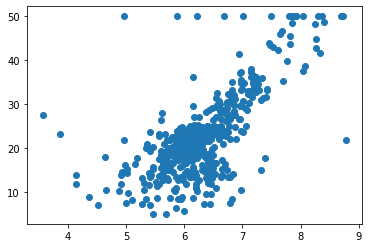

In [67]:
plt.scatter(x[:, 5], y)

#### Startting iteration

In [65]:
import random

k = random.random() * 100 - 100
b = random.random() * 100 - 100

learning_rate = 1e-2
iteration_time = 1000
losses = []

X = x[:, 5]
print(type(list(X)))
print(type(list(y)))
for i in range(iteration_time):
    fitting_value = [linear_function(k, b, x) for x in X]
    
    loss_now = loss(list(y), fitting_value)
    losses.append(loss_now)
    
    print('This is the {0} time\'s iteration. The loss is {1}. The k is {2}, and b is {3}'.format(i + 1, loss_now, k, b))
    
    k = k - partial_derivative_for_k(X, y, fitting_value) * learning_rate
    b = b - partial_derivative_for_b(y, fitting_value) * learning_rate
    
best_k = k
best_b = b

<class 'list'>
<class 'list'>
This is the 1 time's iteration. The loss is 587.9728213298042. The k is -77.39581548329122, and b is -79.03561158226839
This is the 2 time's iteration. The loss is 106.39781312911892. The k is -2.6395889763646636, and b is -67.2761551556723
This is the 3 time's iteration. The loss is 19.5338939884237. The k is 10.849539694499596, and b is -65.14819889308993
This is the 4 time's iteration. The loss is 6.117463692584493. The k is 13.282776923824487, and b is -64.75828659376572
This is the 5 time's iteration. The loss is 5.042671964948471. The k is 13.720934760473847, and b is -64.682012667708
This is the 6 time's iteration. The loss is 4.974598554821456. The k is 13.799072803246284, and b is -64.6623374563173
This is the 7 time's iteration. The loss is 4.966610204292151. The k is 13.812244064698174, and b is -64.65287712976578
This is the 8 time's iteration. The loss is 4.96502311654154. The k is 13.813692035287328, and b is -64.6452615409982
This is the 9 t

This is the 69 time's iteration. The loss is 4.948634009307963. The k is 13.745635084486983, and b is -64.20863830060081
This is the 70 time's iteration. The loss is 4.948371833872563. The k is 13.744518445254021, and b is -64.2015352266657
This is the 71 time's iteration. The loss is 4.94810972148307. The k is 13.743402074541823, and b is -64.19443386082285
This is the 72 time's iteration. The loss is 4.94784767212435. The k is 13.742285972285817, and b is -64.18733420266153
This is the 73 time's iteration. The loss is 4.94758568578122. The k is 13.741170138421447, and b is -64.18023625177108
This is the 74 time's iteration. The loss is 4.947323762438552. The k is 13.740054572884173, and b is -64.17314000774094
This is the 75 time's iteration. The loss is 4.947061902081176. The k is 13.738939275609468, and b is -64.16604547016067
This is the 76 time's iteration. The loss is 4.9468001046939545. The k is 13.737824246532822, and b is -64.15895263861991
This is the 77 time's iteration. Th

This is the 138 time's iteration. The loss is 4.9308269194764724. The k is 13.669213557331986, and b is -63.72251194788791
This is the 139 time's iteration. The loss is 4.930572913089644. The k is 13.668115295356642, and b is -63.71552577385721
This is the 140 time's iteration. The loss is 4.930318967784301. The k is 13.667017297482843, and b is -63.7085412798076
This is the 141 time's iteration. The loss is 4.930065083545753. The k is 13.665919563647078, and b is -63.701558465335076
This is the 142 time's iteration. The loss is 4.9298112603593385. The k is 13.664822093785853, and b is -63.694577330035756
This is the 143 time's iteration. The loss is 4.929557498210343. The k is 13.66372488783569, and b is -63.687597873505844
This is the 144 time's iteration. The loss is 4.929303797084113. The k is 13.662627945733124, and b is -63.680620095341645
This is the 145 time's iteration. The loss is 4.929050156965978. The k is 13.661531267414711, and b is -63.67364399513956
This is the 146 time

This is the 206 time's iteration. The loss is 4.913755763513998. The k is 13.595130195901488, and b is -63.25125894327476
This is the 207 time's iteration. The loss is 4.913508457295665. The k is 13.594049748919762, and b is -63.24438609252079
This is the 208 time's iteration. The loss is 4.9132612105476205. The k is 13.592969561755565, and b is -63.237514894496805
This is the 209 time's iteration. The loss is 4.913014023255569. The k is 13.591889634346423, and b is -63.23064534880535
This is the 210 time's iteration. The loss is 4.912766895405197. The k is 13.590809966629868, and b is -63.22377745504911
This is the 211 time's iteration. The loss is 4.91251982698222. The k is 13.589730558543453, and b is -63.21691121283082
This is the 212 time's iteration. The loss is 4.912272817972354. The k is 13.588651410024744, and b is -63.21004662175334
This is the 213 time's iteration. The loss is 4.912025868361296. The k is 13.587572521011321, and b is -63.20318368141962
This is the 214 time's 

This is the 275 time's iteration. The loss is 4.896830405420103. The k is 13.521185625519015, and b is -62.780888804896776
This is the 276 time's iteration. The loss is 4.896587169280948. The k is 13.520122960155506, and b is -62.77412906511469
This is the 277 time's iteration. The loss is 4.896343991633332. The k is 13.519060550333542, and b is -62.767370950862535
This is the 278 time's iteration. The loss is 4.896100872463206. The k is 13.517998395991672, and b is -62.76061446174941
This is the 279 time's iteration. The loss is 4.89585781175649. The k is 13.516936497068462, and b is -62.75385959738452
This is the 280 time's iteration. The loss is 4.895614809499139. The k is 13.515874853502488, and b is -62.74710635737715
This is the 281 time's iteration. The loss is 4.89537186567708. The k is 13.514813465232347, and b is -62.74035474133669
This is the 282 time's iteration. The loss is 4.895128980276278. The k is 13.513752332196646, and b is -62.73360474887262
This is the 283 time's i

This is the 343 time's iteration. The loss is 4.880422889531711. The k is 13.449503436777132, and b is -62.32490994311752
This is the 344 time's iteration. The loss is 4.880183598945041. The k is 13.448458008991807, and b is -62.31825985360447
This is the 345 time's iteration. The loss is 4.87994436590113. The k is 13.447412832602867, and b is -62.31161136325349
This is the 346 time's iteration. The loss is 4.879705190386116. The k is 13.44636790754986, and b is -62.30496447168004
This is the 347 time's iteration. The loss is 4.879466072386177. The k is 13.445323233772344, and b is -62.298319178499646
This is the 348 time's iteration. The loss is 4.8792270118874965. The k is 13.444278811209896, and b is -62.29167548332795
This is the 349 time's iteration. The loss is 4.8789880088762265. The k is 13.443234639802109, and b is -62.28503338578067
This is the 350 time's iteration. The loss is 4.878749063338557. The k is 13.44219071948858, and b is -62.27839288547362
This is the 351 time's i

This is the 411 time's iteration. The loss is 4.864281521245051. The k is 13.378984010439341, and b is -61.87632755020791
This is the 412 time's iteration. The loss is 4.8640461122097465. The k is 13.377955540620093, and b is -61.86978533231827
This is the 413 time's iteration. The loss is 4.863810759783792. The k is 13.376927318119309, and b is -61.86324468765058
This is the 414 time's iteration. The loss is 4.863575463953559. The k is 13.375899342877517, and b is -61.85670561582651
This is the 415 time's iteration. The loss is 4.863340224705454. The k is 13.374871614835259, and b is -61.85016811646785
This is the 416 time's iteration. The loss is 4.8631050420258575. The k is 13.373844133933089, and b is -61.843632189196455
This is the 417 time's iteration. The loss is 4.862869915901181. The k is 13.372816900111577, and b is -61.83709783363429
This is the 418 time's iteration. The loss is 4.862635187203532. The k is 13.371789913311307, and b is -61.8305650494034
This is the 419 time's

This is the 480 time's iteration. The loss is 4.848295342323007. The k is 13.308596698315839, and b is -61.428585551406144
This is the 481 time's iteration. The loss is 4.848065802195246. The k is 13.30758515469286, and b is -61.42215100304845
This is the 482 time's iteration. The loss is 4.847836317265525. The k is 13.306573854318069, and b is -61.41571800202116
This is the 483 time's iteration. The loss is 4.8476068875205645. The k is 13.305562797132966, and b is -61.40928654795219
This is the 484 time's iteration. The loss is 4.847377512947094. The k is 13.304551983079074, and b is -61.402856640469544
This is the 485 time's iteration. The loss is 4.847148193531854. The k is 13.303541412097927, and b is -61.3964282792013
This is the 486 time's iteration. The loss is 4.84691892926156. The k is 13.30253108413107, and b is -61.39000146377565
This is the 487 time's iteration. The loss is 4.846689720122968. The k is 13.301520999120067, and b is -61.38357619382084
This is the 488 time's it

This is the 548 time's iteration. The loss is 4.8336329267954055. The k is 13.24036293123094, and b is -60.99454250673411
This is the 549 time's iteration. The loss is 4.8334224491579425. The k is 13.239367795936387, and b is -60.98821233368985
This is the 550 time's iteration. The loss is 4.8332120221345205. The k is 13.238372899944268, and b is -60.981883682876635
This is the 551 time's iteration. The loss is 4.833001645712962. The k is 13.237378243197043, and b is -60.9755565539284
This is the 552 time's iteration. The loss is 4.832791319881092. The k is 13.236383825637175, and b is -60.969230946479186
This is the 553 time's iteration. The loss is 4.832581044626756. The k is 13.23538964720715, and b is -60.962906860163116
This is the 554 time's iteration. The loss is 4.832370819937782. The k is 13.23439570784946, and b is -60.956584294614395
This is the 555 time's iteration. The loss is 4.832160645802016. The k is 13.23340200750662, and b is -60.950263249467326
This is the 556 time'

This is the 616 time's iteration. The loss is 4.819435138618332. The k is 13.173235989432051, and b is -60.56754010832247
This is the 617 time's iteration. The loss is 4.81922807515513. The k is 13.172256996305137, and b is -60.5613126175115
This is the 618 time's iteration. The loss is 4.819021061484949. The k is 13.171278238598916, and b is -60.55508662423934
This is the 619 time's iteration. The loss is 4.818814097595817. The k is 13.170299716256775, and b is -60.54886212814588
This is the 620 time's iteration. The loss is 4.81860718347576. The k is 13.169321429222117, and b is -60.54263912887108
This is the 621 time's iteration. The loss is 4.81840031911281. The k is 13.168343377438358, and b is -60.536417626055005
This is the 622 time's iteration. The loss is 4.8181935044949995. The k is 13.167365560848923, and b is -60.5301976193378
This is the 623 time's iteration. The loss is 4.817986739610373. The k is 13.166387979397259, and b is -60.52397910835968
This is the 624 time's iter

This is the 685 time's iteration. The loss is 4.805532579454403. The k is 13.106234806216776, and b is -60.14133767510193
This is the 686 time's iteration. The loss is 4.805335449911496. The k is 13.105271925016051, and b is -60.135212674154815
This is the 687 time's iteration. The loss is 4.805138367772772. The k is 13.104309275361548, and b is -60.12908914610054
This is the 688 time's iteration. The loss is 4.804941333026844. The k is 13.103346857197586, and b is -60.122967090584915
This is the 689 time's iteration. The loss is 4.8047443456623045. The k is 13.102384670468497, and b is -60.11684650725384
This is the 690 time's iteration. The loss is 4.804547405667761. The k is 13.10142271511863, and b is -60.110727395753294
This is the 691 time's iteration. The loss is 4.804350513031823. The k is 13.100460991092344, and b is -60.10460975572934
This is the 692 time's iteration. The loss is 4.8041536677431065. The k is 13.09949949833401, and b is -60.098493586828134
This is the 693 time

This is the 753 time's iteration. The loss is 4.792235188209221. The k is 13.041283567250556, and b is -59.72817517916288
This is the 754 time's iteration. The loss is 4.792041256320091. The k is 13.040336305021285, and b is -59.72214953233638
This is the 755 time's iteration. The loss is 4.791847978620749. The k is 13.039389270582307, and b is -59.716125334510814
This is the 756 time's iteration. The loss is 4.791655509238005. The k is 13.038442463878845, and b is -59.71010258533773
This is the 757 time's iteration. The loss is 4.791463086138805. The k is 13.037495884856133, and b is -59.70408128446877
This is the 758 time's iteration. The loss is 4.791270709312019. The k is 13.036549533459421, and b is -59.698061431555665
This is the 759 time's iteration. The loss is 4.791078378746528. The k is 13.035603409633971, and b is -59.69204302625022
This is the 760 time's iteration. The loss is 4.7908860944312. The k is 13.034657513325062, and b is -59.68602606820431
This is the 761 time's i

This is the 821 time's iteration. The loss is 4.77937168735078. The k is 12.977385907424338, and b is -59.32171462446594
This is the 822 time's iteration. The loss is 4.779187052935034. The k is 12.976454010809963, and b is -59.315786720129076
This is the 823 time's iteration. The loss is 4.779002462918741. The k is 12.975522338290874, and b is -59.30986024128878
This is the 824 time's iteration. The loss is 4.77881791729123. The k is 12.974590889813186, and b is -59.30393518760227
This is the 825 time's iteration. The loss is 4.778633416041821. The k is 12.973659665323021, and b is -59.298011558726834
This is the 826 time's iteration. The loss is 4.778448959159848. The k is 12.97272866476652, and b is -59.29208935431984
This is the 827 time's iteration. The loss is 4.778264546634628. The k is 12.971797888089828, and b is -59.28616857403875
This is the 828 time's iteration. The loss is 4.7780801784555145. The k is 12.97086733523911, and b is -59.28024921754109
This is the 829 time's it

This is the 890 time's iteration. The loss is 4.766735516598091. The k is 12.913607956301975, and b is -58.916015550961
This is the 891 time's iteration. The loss is 4.766553920830929. The k is 12.912691396515871, and b is -58.910185205998665
This is the 892 time's iteration. The loss is 4.766372368732509. The k is 12.911775057136973, and b is -58.90435626307258
This is the 893 time's iteration. The loss is 4.7661908602923315. The k is 12.91085893811228, and b is -58.898528721845594
This is the 894 time's iteration. The loss is 4.766009395499904. The k is 12.909943039388802, and b is -58.892702581980636
This is the 895 time's iteration. The loss is 4.765827974344726. The k is 12.909027360913564, and b is -58.886877843140724
This is the 896 time's iteration. The loss is 4.7656465968163015. The k is 12.908111902633602, and b is -58.881054504988946
This is the 897 time's iteration. The loss is 4.765465262904141. The k is 12.907196664495963, and b is -58.87523256718847
This is the 898 time

This is the 959 time's iteration. The loss is 4.754307307520401. The k is 12.850879640373893, and b is -58.516993330794
This is the 960 time's iteration. The loss is 4.754128700392805. The k is 12.84997816500791, and b is -58.51125893960816
This is the 961 time's iteration. The loss is 4.753950136215272. The k is 12.849076906421748, and b is -58.50552592738435
This is the 962 time's iteration. The loss is 4.7537716149774605. The k is 12.848175864563279, and b is -58.49979429379096
This is the 963 time's iteration. The loss is 4.75359313666907. The k is 12.847275039380385, and b is -58.49406403849648
This is the 964 time's iteration. The loss is 4.753414701279754. The k is 12.846374430820962, and b is -58.48833516116946
This is the 965 time's iteration. The loss is 4.753236308799202. The k is 12.845474038832917, and b is -58.48260766147854
This is the 966 time's iteration. The loss is 4.753057959217097. The k is 12.844573863364172, and b is -58.47688153909243
This is the 967 time's iter

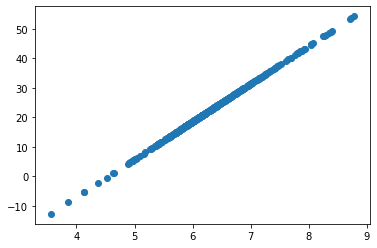

In [68]:
plt.scatter(X, linear_function(best_k, best_b, X))

#### Summary for changing L2-norm to L1-norm
Finally it shows convergence reaching a loss of 4.74. However, the convergence loss is related to the randomlt selected initial k and b.